# Report

### Setup

In [54]:
import pandas as pd
import altair as alt

# Zugriff auf utils
import sys
sys.path.append('../notebooks')

# Cache-Probleme umgehen
import importlib
import utils
importlib.reload(utils)

from utils import load_styled_dataframe
from utils import calc_corr
from utils import create_boxplot_with_count
from utils import load_summary_table
from utils import load_residual_plot

In [14]:
# Farbgebung in Diagrammen
color1 = '#06507F'  # Dunkelblau
color2 = '#330241'  # Dunkellila
color3 = '#0076BF'  # Blau
color4 = '#80BADF'  # Hellblau
color5 = '#E7DDFF'  # Helllila

## Introduction and data

### Motivation und Einführung in das Thema
Der Datensatz bezieht sich auf die Entwicklung einzelner Kohorten (Neukundengruppen) im Loyalty Program von Lidl und lässt sich damit grundlegend in das **Forschungsumfelds des Marketings** einordnen, welche sich intensiv mit dem Kundenverhalten auseinandersetzt. Insights in das Kundenverhalten durch Analytics zu schaffen, ist elementar, um die Kunden besser zu verstehen und sie nachfolgend besser im Customer Lifecycle Management beeinflussen zu können (vgl. Sridharan & Purcell, 2015).

Das Ziel des Loyalty-Programms besteht darin, das Kundenverhalten in den Filialen so transparent wie möglich zu machen. Je mehr Kunden sich mit der App an der Kasse identifizieren, desto transparenter ist das Kundenverhalten.  
Es wird erwartet, dass die verschiedenen Kundengruppen (repräsentiert durch die Kohorten) unterschiedlich aktiv sind. Die Hypothese dabei lautet **"Neuere Kohorten haben eine geringe Identifizierungsrate als frühere Kohorten"**. Wenn diese Hypothese sich bestätigen lässt, so lässt sich ableiten, dass ein Grenzwert für die monatliche Anzahl an Kunden existiert. In dem Zuge wäre die Transparenz über das Kundenverhalten limitiert.

Im Bereich des Marketings gibt es hierzu bereits Modellansätze, die die Hypothese unterstützen und das Kundenverhalten in diesem Rahmen näher erklären: 

**Technology Adaption Curve**

<div style="display: flex; align-items: flex-start; height: 100%;">
  <img src="https://media.licdn.com/dms/image/v2/D4E12AQGI-is2XUC1Tw/article-cover_image-shrink_720_1280/article-cover_image-shrink_720_1280/0/1699328276677?e=2147483647&v=beta&t=yj_-mnJdAYhaY5pMZx8_kXxrQauZUcZIetE96XRGJ1A" width="600" style="margin-right: 20px; flex-shrink: 0;">
  <div style="flex: 1; display: flex; flex-direction: column; justify-content: flex-start;"> 
    <p>Das Modell zeigt auf, dass es verschiedene Kundengruppen im Produktlebenszyklus eines technischen Produkts, wie bspw. einer Kundenbindungsapp gibt. Die Kunden weisen einen unterschiedlichen Charakter auf. Early Adopters sind technikbegeistert und lassen sich gern auf die neue Technoligie ein. Late Adopters benötigen eine gewisse Argumentationsgrundlage bis sie das Produkt vollumfänglich ohne Skepsis nutzen (vgl. Moore, 2014).<br>  
    Je früher sich ein Kunde dazu entschließt, die neue Technologie zu nutzen, desto eher hat er die Chance, die Vorteile zu entdecken, Loyalität zu entwickeln und das Produkt an Late Adopters weiterzuempfehlen.</p>
  </div>
</div>

**Customer Lifecycle**  

<div style="display: flex; align-items: flex-start; height: 100%;">
  <img src="https://blog-assets.freshworks.com/freshdesk/wp-content/uploads/2022/06/17100218/Customer-lifecycle.jpg" width="600" style="margin-right: 20px; flex-shrink: 0;">
  <div style="flex: 1; display: flex; flex-direction: column; justify-content: flex-start;"> 
    <p>Das Konzept des Customer Lifecycles kann damit in Verbindung gebracht werden. Erst wenn der Kunde mit dem Produkt durch die Nutzung in Kontakt gekommen ist, ist es möglich, ihn zur Wiedernutzung zu bewegen (vgl. Crail, 2024).<br>  
    Es ist anzunehmen, dass Early Adopters leichter und schneller in die "Retention" Phase gelangen, als Late Adopters. Dies wird mit der Lust zum Ausprobieren und dem grundlegend längeren Zeitraum zur Entwicklung durch die bereits frühe Teilnahme begründet.Somit wird deutlich, dass der Zeitpunkt, an dem eine Kohorte entsteht, entscheidend für das zukünftige Kundenverhalten ist.<br> Doch nicht nur der Zeitpunkt zur initialen Nutzungsentscheidung beeinflusst das Kundenverhalten. Im Customer Lifecycle Management werden dem Kunden wiederholt Impulse durch Marketingmaßnahmen gegeben, damit das Verhalten zu Gunsten des Unternehmens beeinflusst wird. Bestimmte Monate werden sich auf alle Kohorten auswirken (bspw. die Weihnachtszeit mit vielen Werbeaktionen, die den Umsatz der Kunden steigern soll.)<br>Der Customer Lifecycle kann auch Aufschluss darüber geben, wann ein Kunde am meisten Engagement zeigt. Eine Studie von Aali et al. (2019) konnte aufzeigen, dass die Kunden am meisten mit einem Unternehmen aggieren, wenn sie die anfängliche Skepsis überwunden haben. </p>
  </div>
</div>

**Kundenloyalität vs. Kundenbindung**  
Eng damit verknüpft ist das Konzept der Kundenloyalität. Kundenloyalität beschreibt eine tiefe Verbundenheit mit dem Unternehmen und zeigt sich in langfristigen Erfolgen. Kundenbindung ist eher kurzfristig angedacht und wird durch Impulse wie Rabattaktionen erreicht. Das Loyalty Program kann beides steigern. Wichtig ist, inwieweit der Kunde schon eine Vertrauensbasis gegenüber dem Unternehmen hat, wobei auch hier wieder die Zeit eine wichtige Rolle spiet. (vgl. Klotz, 2024; Jagersbacher, 2024).  

**Fazit**  
Die Konzepte aus der Marketingliteratur zeigen deutlich, dass sowohl der Zeitpunkt der Erstnutzung als auch die Zeitpunkte von Marketingaktivitäten eine tragende Rolle beim Einfluss auf das Kundenverhalten einnehmen. Daher ist es wichtig, diese Variablen in das Modell zu inkludieren, um diese Faktoren korrekt abbilden zu können. 

### Datensatz

In [3]:
path_data = 'https://raw.githubusercontent.com/mm391-030401/project/refs/heads/main/data/processed/'
file_data= 'data_final.csv'

data = pd.read_csv(path_data + file_data, sep=',', encoding='utf-8')

# Obwohl diese Spalten bereits im Notebook "convert_columns" zu Strings konvertiert wurden, wurden sie beim erneuten Einlesen wieder als Integer erkannt
# Allerdings ist es sinnvoll, diese Spalten nicht als Integer (diskret) zu betrachten 
# sondern als ordinale Variablen (Rechenoperationen sind nicht sinnig für die Zeitangaben)
to_str_cols = ['monat', 'monat_jahr','monat_monat', 'kohorte', 'kohorte_jahr', 'kohorte_monat']

# Konvertierung der Spalten in string 
for col in to_str_cols: 
    data[col] = data[col].astype(str)

In [4]:
data.head(3)

,monate_seit_einfuehrung_programm_kohorte,monat,monat_jahr,monat_monat,monat_jahreszeit,kohorte,kohorte_jahr,kohorte_monat,kohorte_jahreszeit,erster_monat_kohorte_fg,monate_seit_existenz_kohorte,kohortengroesse_indexiert,identifizierte_kunden_indexiert,rabatt_indexiert,retentionrate
0,-2,201408,2014,8,Sommer,201408,2014,8,Sommer,True,0,0.41,0.41,2.54,100.000000
1,-2,201409,2014,9,Herbst,201408,2014,8,Sommer,False,1,0.41,0.40,7.14,97.560976
2,-2,201410,2014,10,Herbst,201408,2014,8,Sommer,False,2,0.41,0.39,9.28,95.121951


In [5]:
data.tail(3)

,monate_seit_einfuehrung_programm_kohorte,monat,monat_jahr,monat_monat,monat_jahreszeit,kohorte,kohorte_jahr,kohorte_monat,kohorte_jahreszeit,erster_monat_kohorte_fg,monate_seit_existenz_kohorte,kohortengroesse_indexiert,identifizierte_kunden_indexiert,rabatt_indexiert,retentionrate
700,33,201707,2017,7,Sommer,201707,2017,7,Sommer,True,0,17.49,17.49,23.76,100.000000
701,33,201708,2017,8,Sommer,201707,2017,7,Sommer,False,1,17.49,8.54,11.85,48.827902
702,34,201708,2017,8,Sommer,201708,2017,8,Sommer,True,0,15.13,15.13,14.28,100.000000


**Erklärung Unterschied zwischen Kohorte und Monat**  
In der Spalte Kohorte befindet sich der Entstehungsmonat einer Kohorte. Kohorte 201408 umfasst also alle Kunden, die das erste Mal im August 2014 mit der App eingekauft haben. Der Kundenstamm bleibt der gleiche. Die Kohorte kann für alle Monate in der Zukunft betrachtet werden (*Monat muss immer größer-gleich Kohorte sein*).  
Die Spalte Monat zeigt den Monat auf, in dem die Retentionrate der Kohorte erhoben wurde. Beispielsweise wurde im Monat 201708 (August 2017) jede Retentionrate der Kohorten aufgezeichnet, die diesen Monat oder früher Teil des Programms sind.

In [12]:
load_styled_dataframe('../references/styled_data_dictionary.html')

,Name,Format,Type,Role,Description
0,monate_seit_einfuehrung_programm_kohorte,int64,number - discrete,Predictor,"Hier wird gezeigt, in welchem Zeitraum seit offizieller Einführung des Programms die Kohorte entstanden ist. Ist der Wert hier 0 so ist die Kohorte entstanden, in dem Monat, in dem auch das Programm eingeführt wurde. Negative Werte resultieren aus Testzeiträumen. Da alle Daten in Monaten erhoben werden, wird diese Saplte als diskret betrachtet."
1,monat,object,ordinal,Predictor,"Der Monat sagt aus, in welchem Monat das Einkaufsverhalten einer Kohorte aufgenommen wurde."
2,monat_jahr,object,ordinal,Predictor,"Der Jahreswert aus der Spalte ""monat""."
3,monat_monat,object,ordinal,Predictor,"Der Monatswert aus der Spalte ""monat""."
4,monat_jahreszeit,object,ordinal,Predictor,"Die Jahreszeit aus der Spalte ""monat""."
5,kohorte,object,ordinal,Predictor,"Der Monat, an dem die Kohorte entstanden ist."
6,kohorte_jahr,object,ordinal,Predictor,"Der Jahreswert aus der Spalte ""kohorte""."
7,kohorte_monat,object,ordinal,Predictor,"Der Monatswert aus der Spalte ""kohorte""."
8,kohorte_jahreszeit,object,ordinal,Predictor,"Die Jahreszeit aus der Spalte ""kohorte""."
9,erster_monat_kohorte_fg,bool,nominal,Predictor,"Hier wird eine Flag gesetzt, wenn der Monat der erste einer Kohorte ist. Hier ist der Wert der Spalte ""monat"" und der Spalte ""kohorte"" also gleich. Die Flag könnte für das Modell wichtig sein, da der erste Monat einer Kohorte sehr auffällig im Einkaufsverhalten ist und für das normale Verhalten nicht repräsentativ ist."


### Variablen für die EDA

In [13]:
y_label = 'retentionrate'
x_float = 'rabatt_indexiert' # die anderen kontinuierlichen Variablen gehören zur Response Variable
list_numeric = data.select_dtypes(include = 'number').columns.to_list()
list_category = data.select_dtypes(include = ['object', 'bool']).columns.to_list()

### EDA

#### Überblick Response Variable

In [32]:
# Histogramm
hist = alt.Chart(data).mark_bar(color=color1).encode(
    x=alt.X(y_label, bin=alt.Bin(maxbins=30), title=y_label),
    y=alt.Y('count()', title='Anzahl'),
    tooltip=alt.Tooltip(value='Histogramm') 
).properties(
    title='Übersicht Verteilung Response Variable',
    width=600,
    height=400
).interactive()

# Mittelwert-Linie
mean = alt.Chart(data).mark_rule(color=color4).encode(
    x=alt.X(f'mean({y_label}):Q'),
    size=alt.value(5),
    tooltip=alt.Tooltip(value='Mittelwert') 
)

# Median-Linie
median = alt.Chart(data).mark_rule(color=color3).encode(
    x=alt.X(f'median({y_label}):Q'),
    size=alt.value(5),
    tooltip=alt.Tooltip(value='Median') 
)

# Dichtekurve
density = alt.Chart(data).transform_density(
    y_label, 
    as_=[y_label, 'density'],
    bandwidth=1  # Hier eine geeignete Bandbreite
).mark_line(color=color2).encode(
    x=alt.X(f'{y_label}:Q', title=y_label),
    y=alt.Y('density:Q', title='Dichte'),
    tooltip=alt.Tooltip(value='Dichtekurve'),
    size = alt.value(5)
).properties(
    width=600,
    height=400
)

# Kombination der Charts mit sekundärer y-Achse für die Dichtekurve
combined_chart = alt.layer(
    hist,
    density.encode(y=alt.Y('density:Q', axis=alt.Axis(title='Dichte')))
).resolve_scale(
    y='independent'
) + mean + median

combined_chart

alt.LayerChart(...)

In [51]:
pd.DataFrame(data[y_label].describe()).T

,count,mean,std,min,25%,50%,75%,max
retentionrate,703.0,55.442768,15.491696,35.752785,46.394922,49.102845,57.336771,100.0


**Interpretation der Response-Variable**  
Die Verteilung der Response-Variable zeigt deutliche Eigenschaften, die für die weitere Modellierung berücksichtigt werden sollten. Das Histogramm verdeutlicht, dass die Daten eine asymmetrische Verteilung mit einer starken Rechtsschiefe aufweisen. Der Großteil der Werte konzentriert sich im Bereich von 45 bis 55, was auf eine hohe Dichte in diesem Bereich hinweist. Gleichzeitig gibt es einen kleineren Anteil an Beobachtungen in den höheren Bereichen von 70 bis 100, was auf mögliche Ausreißer oder spezifische Subgruppen in den Daten hindeutet.
Die Lage der beiden zentralen Maße – Median (dunkle vertikale Linie) und Mittelwert (helle vertikale Linie) – unterstreicht die positive Schiefe der Verteilung. Der Median liegt deutlich links vom Mittelwert, was darauf zurückzuführen ist, dass die höheren Werte den Mittelwert nach rechts ziehen.
Die Dichtekurve gibt zusätzlich interessante Einblicke in die Struktur der Daten. Neben einem klaren Hauptgipfel im Bereich von 45 bis 50 zeigt die Kurve kleinere Peaks in den Bereichen von 75 bis 95. Diese könnten auf unterschiedliche Gruppen oder Cluster innerhalb der Daten hinweisen, wie z. B. verschiedene Kundensegmente oder Bedingungen, die unterschiedliche Retentionsraten bewirken.

*Implikationen für die Modellierung*  
Die Analyse der Verteilung liefert mehrere Hinweise für die Vorbereitung der Daten:
- Schiefe der Verteilung:  
Die starke positive Schiefe könnte die Modellleistung beeinflussen. Eine Transformation der Daten, wie beispielsweise eine logarithmische Transformation, könnte dazu beitragen, die Verteilung zu symmetrisieren.
- Ausreißer:  
Die Werte im Bereich 75–100 sollten genauer untersucht werden. Es könnte sinnvoll sein, diese Ausreißer zu behandeln oder separat zu modellieren.

#### Zusammenhänge numerische Variablen

In [53]:
alt.Chart(data).mark_circle(color=color1).encode(
    x = alt.X(x_float),
    y = alt.Y(y_label),
    tooltip = ['kohorte', 'monat_monat', 'kohortengroesse_indexiert']
).interactive()

alt.Chart(...)

Die rechten Ausreißer stammen ausschließlich aus der Kohorte 202410 (größte Kohorte im Datensatz). Die Kohorte beansprucht den meisten Rabatt. Damit ein möglicher Zusammenhang nicht nur durch die oberen Ausreißer erscheint, wurde der Zusammenhang je Kohorte in einzelnen Scatterplots betrachtet. Dies ist dem Notebook EDA zu entnehmen. Daraus geht hervor, dass jede Kohorte einem gewissen eigenen Muster folgt.

In [33]:
load_styled_dataframe('../reports/figures/corr_rabatt_kohorten.html')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Kohorte_Zeile1,201408,201409,201410,201411,201412,201501,201502,201503,201504,201505,201506,201507,201508,201509,201510,201511,201512,201601,nan
Korrelation_Zeile1,0.08,0.19,0.65,0.64,0.69,0.42,0.30,0.22,0.12,0.06,0.16,0.02,-0.16,-0.29,-0.36,-0.32,-0.06,-0.14,nan
Kohorte_Zeile2,201602,201603,201604,201605,201606,201607,201608,201609,201610,201611,201612,201701,201702,201703,201704,201705,201706,201707,201708
Korrelation_Zeile2,0.04,-0.05,0.21,0.24,0.46,0.43,0.69,0.80,0.91,0.94,0.83,0.93,0.89,0.94,0.90,1.00,1.00,1.00,nan


Das Dataframe zeigt die Korrelation zwischen der Retentionrate und dem Rabatt je nach Kohorte, da sich in der tiefergehenden EDA gezeigt hat, dass jede Kohorte einem eigenen Muster folgt.

In [35]:
calc_corr(data, y_label, x_float)

Korrelation zwischen retentionrate und rabatt_indexiert beträgt: 0.24


Die Korrelation zwischen dem Rabatt und der Retentionrate schwankt je nach Kohorte. Die Korrelation insgesamt beträgt auch nur 0.24 und ist damit eher schwach. Es ist fraglich, ob der Rabatt tatsächlich ein geeigneter Predictor ist.  
Daher wird vorgeschlagen erst die Auswahl der Zeitvariablen zu optimieren und dann am Schluss den Rabatt als Feature mitzugeben und zu schauen, ob es das Modell positiv beeinflusst.

In [37]:
create_boxplot_with_count(data, y_label, 'monate_seit_einfuehrung_programm_kohorte', color1)

alt.LayerChart(...)

`monate_seit_einfuehrung_programm_kohorte` gibt an, an welchem Zeitpunkt des Lebenszyklus des Programms die Kohorte dazugekommen ist. Die Kohorten, die schon relativ früh ins Programm eingetreten sind (weiter links auf der X-Achse), zeigen eine eher höhere Retention Rate. Auch die sehr späten Kohorten zeigen eine hohe Retention Rate. Dies liegt jedoch daran, dass nur wenige Werte in die Verteilung eingeflossen sind (siehe blaue Zahlen im Diagramm). Da der erste Monat immer eine Retentionrate von 100 aufweist (gut daran zu sehen, dass bei jedem Wert auf der x-Achse mindestens eine 100 dabei ist), wirkt es so, als ob die späteren Kohorten eine hohe Retention haben. Würde man diese Kohorten im weiteren Zeitverlauf beobachten, so würde die Retentionrate analog der anderen Kohorten ebenfalls sinken und die Box verkleinern und nach unten verschieben.

In [38]:
create_boxplot_with_count(data, y_label, 'monate_seit_existenz_kohorte', color1)

alt.LayerChart(...)

`monate_seit_existenz_kohorte` gibt an, wie lang die aktuelle Kohorte schon teil des Programms ist. Daher ist bei Wert 0 die Retentionrate auch ausschließlich 100, da sie den ersten Monat der Kohorte angibt und auch alle 37 Kohorten beinhaltet. Der rapide Abstieg von 0 auf 1 zeigt das normale Verhalten der Kunden, dass die, die im ersten Monat da waren nicht alle im Folgemonat zurückkehren (Median von Monat 1, also einen Monat nach Entstehung der Kohorte, liegt bei 59,5). Bis Monat 9 ist ein Abstieg der Retentionrate zu beobachten (Gemessen am Median). Danach steigt die Retention tendenziell wieder. Dies zeigt zwei Effekte: Es findet keine Kundenabwanderung im großen Stil mehr statt. Gleichzeitig kommen eher die zurück, die im Monat 0 sich das erste mal identifiziert haben (Schwankendes Einkaufsverhalten, welches der Kunde über die App identifiziert). Zusätzlich sind immer weniger Kohorten vorhanden, die den Mittelwert beeinflussen, je stärker diese Variable ansteigt (Wert 36 zeigt ausschließlich die älteste Kohorte, siehe blaue Zahlen im Diagramm). Aus der Folgebetrachtung der Variable `kohorte` geht hervor, dass frühere Kohorten eine tendenziell höhere Retention zeigen. Der Doppeleffekt führt zu einer zunehmenden Steigerung der Retentiorate.

**Überprüfung Korrelation**  
Es wird die Spearman-Korrelation zwischen den beiden diskreten Variablem und der Response Variable berechnet aufgrund dem besseren Umgang mit Ausreißern.

In [39]:
calc_corr(data, y_label, 'monate_seit_einfuehrung_programm_kohorte')

Korrelation zwischen retentionrate und monate_seit_einfuehrung_programm_kohorte beträgt: -0.52


In [40]:
calc_corr(data, y_label, 'monate_seit_existenz_kohorte')

Korrelation zwischen retentionrate und monate_seit_existenz_kohorte beträgt: -0.07


In [41]:
calc_corr(data, 'monate_seit_einfuehrung_programm_kohorte', 'monate_seit_existenz_kohorte')

Korrelation zwischen monate_seit_einfuehrung_programm_kohorte und monate_seit_existenz_kohorte beträgt: -0.47


`monate_seit_existenz_kohorte` korreliert nicht mit der Response Variable. `monate_seit_einfuehrung_programm_kohorte` zeigt allerdings eine Korrelation und könnte ein guter Prediktor für das Modell sein.

In [42]:
create_boxplot_with_count(data, y_label, 'monate_seit_einfuehrung_programm_kohorte', color1) & create_boxplot_with_count(data, y_label, 'kohorte', color1)

alt.VConcatChart(...)

Es ist zu beachten, dass `monate_seit_einfuehrung_programm_kohorte` und `kohorte` auf die gleiche Weise die Daten abbilden. Wird also `monate_seit_einfuehrung_programm_kohorte` in das Modell inkludiert, so sind alle anderen Variablen, die Auskunft über die Entstehung der Kohorte geben grundsätzlich hinfällig (`kohorte`, `kohorte_monat`, `kohorte_jahr`, `kohorte_jahreszeit`).  
Die einzige sinnvolle Ergänzung bieten `kohorte_monat` und `kohorte_jahreszeit` da sie keine Aussage über das Alter der Kohorte machen sondern eher eine Aussage darüber treffen, in welcher Saison die Kohorte dazugekommen ist. Hält die Annahme stand, dass Kundenverhalten saisonal ist, so könnte die Saison, in der eine Kohorte entsteht, das Verhalten der Kohorte beeinflussen. Es ist zu prüfen, ob einer der beiden Variablen das Modell verbessert.

#### Zusammenhänge kategorische Variablen

In [43]:
charts_cat = []

for cat in list_category:
    # Prüfen, ob die Kategorie numerisch sortiert werden soll
    if cat in ['monat_monat', 'kohorte_monat']:  # Nur für diese Kategorien numerische Sortierung
        sort_order = sorted(data[cat].unique(), key=lambda x: float(x))
    else:
        # Wenn die Kategorie nicht in der Liste ist, lasse die Sortierung standardmäßig
        sort_order = None

    # Erstellen des Diagramms (Median statt Mean)
    chart = alt.Chart(data).mark_bar(color=color1).encode(
        x=alt.X(f'median({y_label}):Q', title=y_label), 
        y=alt.Y(f'{cat}', title=cat, sort=sort_order),
        tooltip=[
            alt.Tooltip(f'{cat}:N', title='Kategorie'),  # Kategorie anzeigen
            alt.Tooltip(f'median({y_label}):Q', title='Median', format=".2f"),  # Median mit 2 Dezimalstellen
            alt.Tooltip(f'count():Q', title='Anzahl Zeilen für Median')  # Wie viele Werte sind im Median enthalten?
        ]
    ).properties(
        title=f'Median {y_label} je {cat}',
        width=300,
        height=300
    ).interactive()
    
    charts_cat.append(chart)

# Kombinieren der Charts in ein Grid
grid_chart_cat = alt.concat(*charts_cat, columns=3)
grid_chart_cat.display()

alt.ConcatChart(...)

- Die Variable `erster_monat_kohorte_fg` scheint relevant für das Modell zu sein. So wird deutlich, dass der erste Monat einer Kohorte, wo die Retention immer bei 100 liegt, nicht die Standardretention ist. So werden bereits viele der zuvor angesprochenen Ausreißer erklärt.
- Ebenfalls wird deutlich, dass beiden zeitliche Faktoren (Entstehung der Kohorte und Zeitverlauf des Einkaufsverhaltens) in das Modell inkludiert werden sollten. Im Zeitverlauf (`monat`) wird die Retention eher schlechter, während frühe als auch spätere Kohorten (`kohorte`) eher eine bessere Retention zeigen. Es besteht ein Unterschied in der Reaktion der Retention zwischen dem normalen Zeitverlauf in Monaten vs. der Monate der Entstehung der Kohorten. Das "Level" der Zeit (also braucht man die Granularität von `monat` und `kohorte` oder reicht z.B. aich `kohorte_monat` und `monat_monat`) sollte in mehreren Testläufen optimiert werden.
- Zu beachten ist hierbei die zuvor gewonnene Erkenntnis über die Variable `monate_seit_einfuehrung_programm_kohorte`.

#### Fazit für die Modellierung  
- Um die Ausreißer korrekt zu behandeln, sollte unbedingt die Variable `erster_monat_kohorte_fg` mit in die Modellierung einfließen.
- Sowohl die Variable `kohorte` als auch `monat` ist von Relevanz.  
Bei der `kohorte` ist es eher wichtig, auf den Zeitpunkt der Entstehung (Early vs. Late Adopters) zu achten. Die Variable `monate_seit_einfuehrung_programm_kohorte` zeigt dies gut auf. Um mögliche Saisonalitäten abzufangen, ist es möglich `kohorte_monat` oder `kohorte_jahreszeit` ebenfalls zu inkludieren. `kohorte` und `kohorte_jahr` sind allerdings nicht notwendig.
Bei `monat` ist es eher wichtig, die Saisonalität, die die Retentionrate beeinflussen kann, abzubilden. Es sollte daher mindestens `monat_jahreszeit` inkludiert werden.
- `rabatt_indexiert` scheint kein verlässlicher Prediktor zu sein. Er sollte zum Schluss hinzugefügt werden.
- Es ist zu prüfen ob eine logarithmische Transformation der Response-Variable das Modell verbessert (aufgrund Rechtsschiefe). Falls `rabatt_indexiert` in das Modell einbezogen wird, sollte diese auch transformiert werden (ebenfalls Rechtsschiefe). Da die Rechtsschiefe hauptsächlich durch die Retentionrate 100 ausgelöst wird und diese durch die Variable `erster_monat_kohorte_fg` erklärt wird, ist die Transformation eventuell nicht notwendig.  

## Methodology

Als Grundlage wird die Lineare Regression verwendet. Diese wurde im Modul ausführlich behandelt und eignet sich grundsätzlich für die Vorhersage von einer numerischen Variable. Dem Verfasser ist bewusst, dass sich prinzipiell eher andere Modelle  eignen, da es sich bei den Daten um Time Series handelt bzw. die Zeitvariablen eine tragende Rolle einnehmen. Allerdings übersteigt dies die aktuellen Kenntnisse. Daher wird sich darauf fokussiert, ein bestmögliches Ergebnis mit der Linearen Regressionen zu erzielen.

Hierfür wird folgendes ausprobiert:
- Verschiedene Feature-Kombination, dabei sollten die besten Kombinationen mit den Erwartungen aus der EDA übereinstimmen.
- Der Einfluss einer logarithmischen Transformationen, um die Rechtsschiefe zu glätten.
- Der Einfluss einer zyklischen Kodierung der Monate, um dem Modell beizubringen, dass der Dezember dem Janur näher ist als dem Juli. Zu beachten ist dabei, dass `kohorte_monat` und `monat_monat` dann numerisch werden statt wie bisher kategorisch.

Zu diesem Zweck wurde ein Modellierungsworklflow mit Hilfe von **Funktionen** gebaut, um auf einen schnellen Weg möglichst viele Modelle zu trainieren und zu testen. Dabei wird immer wie folgt vorgegangen:
- Generierung Feature-List `generate_combinations()`:  
Es werden alle möglichen Feature-Kombinationen generiert, um dann für jede Kombination ein Modell zu erstellen. Anhand des R^2 werden später die Top-Kombinationen gefiltert und mit der Erwartungshaltung aus der EDA abgeglichen.
- Data Preprocessing `preprocess_data()`:  
Da der Datensatz keine Null-Values enthält ist ein Data-Cleaning nicht notwendig. Wenn der aktuelle Versuch kategorische Features enthält, findet ein One-Hot-Encoding statt (True-False Transformation der Kategorien). Für die Prävention einer Verfälschung des Modells wird immer eine True-False-Spalte gelöscht und fließt somit nicht in das Modell ein.
- Data Splitting `train_test_split()`:
Die Daten werden in Trainings- und Testdaten aufgeilt. Die Testgröße beträgt 20%. Ein Fünftel der Daten werden also dem Modell nicht gezeigt, um später eine Prediction für diese Daten von dem Modell erstellen zu lassen und sie mit den tatsächlichen Daten gegenprüfen zu können. Dies ist wichtig für die Validierung des Modells.
- Training und Validierung `train_and_validate_model()`:  
Das Modell wird mit den Traningsdaten (80% der Daten) trainiert und auf seine Stabilität geprüft. Hierfür werden die 80% nochmal aufgeteilt. In 5 Durchgängen geschieht dies zufällig. Ziel ist es, dass das Modell den kleineren Teil der 80% mit dem größeren Teil immer mit einer ähnlichen Fehlerrate vorhersagen kann. Dann geht man davon aus, dass das Modell nicht von einzelnen Datenpunkten stark in seiner Vorhersage beeinflusst wird.
- Prediction und Evaluierung `evalute_model()`:  
Das Modell, welches mit den Trainingsdaten trainiert wurde, macht nun mit den Testdaten eine Vorhersage. Anhand der Vorhersage und der tatsächlichen Werte, lassen sich Evaluierungsmetriken berechnen (R^2, Mean Squared Error, Root Mean Squared Error und Mean Absolute Error). Wurde eine logarithmische Transformation vorgenommen, wird diese für die Berechnung der Metriken rückgängig gemacht. So lassen sich die Metriken in den einzelnen Durchläufen besser miteinander vergleichen.
- Speicherung der Koeffizienten `generate_summary_table()`:  
Für jedes Modell wird eine Übersicht der Koeffizienzen für den y-Achstenabschnitt und die einzelnen Features abgespeichert.
- Residual Plot `save_residual_plot()`:  
Für jedes Modell wird ein Residual-Plot erstellt und gespeichert. Er zeigt grafisch auf, bei welchen Datenpunkten die Prediction wie stark abweicht. Wichtig ist hier, dass eine Gleichverteilung um die 0-Abweichung zu sehen ist. Ist ein Muster erkennbar, so kann man davon ausgehen, dass dem Modell etwas wichtiges für die Vorhersage fehlt.
- Klare Namenskonvention bei der Abspeicherung `generate_model_names()`:  
Jeder Modellversuch wird mit einer ID, einem Timestamp und einem kurzen Namen für den aktuellen Modelldurchlauf versehen. Der Modelldurchlauf bezieht sich dabei nicht auf die Feature-Kombination, da der Name sonst zu lang wäre, sondern auf die grundlegende Verwendung der Daten für das Modell (Wurden z.B. eine Transformation durchgeführt?).

Der Gesamte Worklflow mit der Generierung der einzelnen Modelldaten sowie der Abspeicherung findet durch diese Funktion statt: `run_full_pipeline_with_featurelist()`. Zum Schluss wird eine Übersichtstabelle generiert, die die Top-N der Feature-Kombinationen sortiert nach dem besten R^2 ausgibt. 

Der Prozess findet viermal statt:
1. Lineare Regression auf data ohne Transformation
2. Lineare Regression auf data mit logarithmischer Transformation von `rabatt_indexiert` und `retentionrate`
3. Lineare Regression auf data mit logarithmischer Transformation von `retentionrate`
4. Lineare Regression auf data mit zyklischer Kodierung von `monat_monat` und `kohorte_monat`

## Results

In [45]:
load_styled_dataframe('../models/00_final_df')

,Model,R_squared,MSE,RMSE,MAE,Features,validation_count,validation_mean,validation_std,validation_min,validation_25%,validation_50%,validation_75%,validation_max
0,124_20250114-181601_Lineare_Regression,0.704,64.415,8.026,6.100,"['erster_monat_kohorte_fg', 'monate_seit_einfuehrung_programm_kohorte', 'kohorte_monat', 'monat_jahreszeit', 'kohorte_jahreszeit', 'rabatt_indexiert']",5.000,59.903,9.047,46.442,55.763,63.241,64.196,69.876
1,106_20250114-181558_Lineare_Regression,0.704,64.415,8.026,6.100,"['erster_monat_kohorte_fg', 'monate_seit_einfuehrung_programm_kohorte', 'kohorte_monat', 'monat_jahreszeit', 'rabatt_indexiert']",5.000,59.903,9.047,46.442,55.763,63.241,64.196,69.876
2,121_20250114-181600_Lineare_Regression,0.703,64.632,8.039,6.061,"['erster_monat_kohorte_fg', 'monate_seit_einfuehrung_programm_kohorte', 'monat_monat', 'kohorte_monat', 'monat_jahreszeit', 'rabatt_indexiert']",5.000,60.623,8.250,49.237,54.994,64.614,64.877,69.393
3,101_20250114-181557_Lineare_Regression,0.703,64.632,8.039,6.061,"['erster_monat_kohorte_fg', 'monate_seit_einfuehrung_programm_kohorte', 'monat_monat', 'kohorte_monat', 'rabatt_indexiert']",5.000,60.623,8.250,49.237,54.994,64.614,64.877,69.393
4,127_20250114-181601_Lineare_Regression,0.703,64.632,8.039,6.061,"['erster_monat_kohorte_fg', 'monate_seit_einfuehrung_programm_kohorte', 'monat_monat', 'kohorte_monat', 'monat_jahreszeit', 'kohorte_jahreszeit', 'rabatt_indexiert']",5.000,60.623,8.250,49.237,54.994,64.614,64.877,69.393
5,122_20250114-181600_Lineare_Regression,0.703,64.633,8.039,6.061,"['erster_monat_kohorte_fg', 'monate_seit_einfuehrung_programm_kohorte', 'monat_monat', 'kohorte_monat', 'kohorte_jahreszeit', 'rabatt_indexiert']",5.000,60.623,8.250,49.237,54.994,64.614,64.877,69.393
6,70_20250114-181553_Lineare_Regression,0.703,64.733,8.046,6.164,"['erster_monat_kohorte_fg', 'monate_seit_einfuehrung_programm_kohorte', 'kohorte_monat', 'rabatt_indexiert']",5.000,60.365,9.323,45.949,56.984,63.997,64.718,70.176
7,107_20250114-181558_Lineare_Regression,0.703,64.733,8.046,6.164,"['erster_monat_kohorte_fg', 'monate_seit_einfuehrung_programm_kohorte', 'kohorte_monat', 'kohorte_jahreszeit', 'rabatt_indexiert']",5.000,60.365,9.323,45.949,56.984,63.997,64.718,70.176
8,105_20250114-181558_Lineare_Regression,0.702,65.031,8.064,6.384,"['erster_monat_kohorte_fg', 'monate_seit_einfuehrung_programm_kohorte', 'kohorte_monat', 'monat_jahreszeit', 'kohorte_jahreszeit']",5.000,62.401,8.482,50.090,60.385,61.634,66.976,72.920
9,68_20250114-181553_Lineare_Regression,0.702,65.031,8.064,6.384,"['erster_monat_kohorte_fg', 'monate_seit_einfuehrung_programm_kohorte', 'kohorte_monat', 'monat_jahreszeit']",5.000,62.401,8.482,50.090,60.385,61.634,66.976,72.920


Zu sehen sind hier die Top 15 Feature-Kombinationen aus der 1. Runde, in der keine weiteren Anpassungen der Daten vorgenommen wurden. Die Transformationen konnte keine Verbesserung des R^2 erzielen, sondern lagen in der Top-Feature-Kombination immer unter den hier dargestellen 0,7. Daher wird auf diese nicht weiter eingegangen.

Wie bereits erwartet, finden sich immer die Variablen `erste_monate_kohorte_fg` sowie `monate_seit_einfuehrung_programm_kohorte` in den Top 15 Kombinationen. Das deckt sich also mit der Erwartung aus der EDA, dass diese Variablen wichtig für das Modell sind. Ebenfalls befindet sich fast ausschließlich immer eine Kombination aus `kohorte` und `monat` als zusätzliche kategorische Variable wieder. Auch das deckt sich aus der EDA. 
Ebenfalls wichtig zu sehen ist, dass es wohl keinen zusätzlichen Mehrwert generiert, Jahreszeit und Monat gleichzeitig in das Modell zu integrieren (siehe Vergleich Zeile 0 mit Zeile 1). Zeile 1 sollte also vor Zeile 0 präferiert werden, um die Modellkomplexität zu reduzieren.
Ebenfalls auffällig ist, dass `rabatt_indexiert` keinen wirklichen Mehrwert liefert (Vergleich Zeile 1 mit Zeile 9). `rabatt_indexiert` verbessert den R^2 nur um 0,02 bei sonst gleicher Feature-Kombination. Allerdings ist der MAE um 0.284 schlechter.
Vergleicht man die Standardabweichung bei der Kreuzvalidierung `validation_std` (Aussage über Stabilität des Modells), so scheint `rabatt_indexiert` das Modell eher instabiler zu machen (Vergleich Zeile 0-7 mit 8-14). Mit der Erkenntnis aus der EDA wird insgesamt eher abgeraten ein Modell mit `rabatt_indexiert` zu wählen. Daher wird eins aus den Zeilen 8-14 ausgewählt.

Unter Berücksichtigung einer reduzierten Modellkomplexität (möglichst Jahrezeit vor Monat da Spaltenanzahl um 8 geringer) und einem ausgeglichenen Verhältnis von R^2, MAE und Standardabweichung der Kreuzvalidierung sowie einer Übereinstimmung mit der Erwartungshaltung aus der EDA wird sich für das Modell `68_20250114-181553_Lineare_Regression` entschieden.

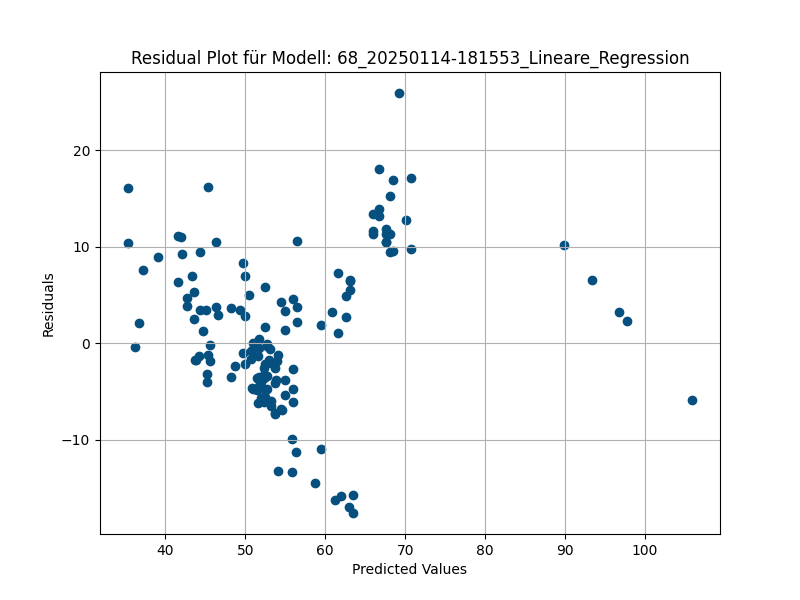

In [52]:
load_residual_plot('68_20250114-181553_Lineare_Regression')

Es ist positiv, dass kein wirkliches Muster erkennbar ist. Dadurch, dass sich allgemein die Werte eher im Bereich 45 bis 60 bewegen ist hier die große Streuung in beide Richtungen auch in Ordnung (Modell hat hier mehr Möglichkeiten Fehler zu machen). Interessant ist, dass sich das Modell im Bereich von 70 immer unterschätzt (der wahre Wert liegt eher zwischen 80 und 90). Bei der sporatischen Sichtung anderer Plots, konnte jedoch kein besseres Modell gefunden werden. Mit der Linearen Regression kann dieses Problem daher aktuell nicht behoben werden. Ausreißer nach oben müssten also noch besser behandelt werden.  
Auch auffällig ist der Punkt rechts außen. Hier hat das Modell einen Wert über 100 vorhergesagt. Dies liegt außerhalb des definierten Wertebereichs für die Response Variable. Auch dafür konnte mit dem aktuellen Kenntnisstand und der Wahl der linearen Regression jedoch keine grundsätzliche Lösung gefunden werden. Andere Residual Plots zeigten ebenfalls diesen Ausreißer. Denkbar wäre es, die Vorhersagen, die außerhalb des erwarteten Wertebereichs liegen, zu entfernen oder zu kennzeichnen.

In [48]:
load_summary_table('68_20250114-181553_Lineare_Regression')

,Name,Coefficient
0,Intercept,55.246
1,erster_monat_kohorte_fg,50.907
2,monate_seit_einfuehrung_programm_kohorte,-0.598
3,kohorte_monat_10,7.355
4,kohorte_monat_11,1.282
5,kohorte_monat_12,-1.309
6,kohorte_monat_2,-0.374
7,kohorte_monat_3,-0.055
8,kohorte_monat_4,1.596
9,kohorte_monat_5,3.047


Die Koeffizienten stimmen mit der Erwartungshaltung überein.
- Ist die Flag `erster_monat_kohorte_fg` auf 1 gesetzt, so erhöht sich die Retention um 50.907. Da in diesem Fall die Retention immer 100 beträgt macht dieser große Anstieg durchaus Sinn, wenn man die Größe des y-Achsenabschnitts von 55.246 betrachtet (Ausgangspunkt des Modells, wenn alle anderen Features nicht da sind).
- Bei einem Anstieg von `monate_seit_einfuehrung_programm_kohorte` um 1 reduziert sich die Retentionrate um 0,598. Auch das stimmt mit der Erwartungshaltung überein, dass Late Adopters eher eine schlechtere Retentionrate haben.
- Kohorten, die im August und September entstehen, haben eher eine bessere Retentionrate. Kohorten, die im Detemeber, Februar und März entstehen, haben eher eine schlechtere Retentionrate. Dies könnte einen Hinweis darauf geben, dass starke Marketingaktion wie bspw. im Dezember rund um Weihnachten eher Kunden anlockt, die nicht nachhaltig das Programm nutzen. In den Sommermonaten, bei denen eher weniger Marketingaktionen stattfindet, aquiriert man loyaler Kunden. Dies ist jedoch eine Hypothese, die weiter verfolgt werden muss. Das Modell gibt jedoch schon einen guten Anhaltspunkt.
- Anders sieht es widerrum bei dem Monatsverlauf aus. Im Winter wird von den Kohorten eine bessere Retention gezeigt als in den anderen Jahreszeiten. Auch dies könnte mit den Marketingaktionen zusammenhängen, da sie grundsätzlich mehr Kunden in den Laden lockt.
- Zusammenfassend kann man eine Saisonalität erkennen. Je nach Zielvorstellung erreicht man mit Marketingaktivitäten die typischerweise im Winter zur Weihnachtszeit ihren Höhepunkt erreichen, dass man bestehende Kunden wieder in den Laden lockt, allerdings weniger loyale Neukunden für sich gewinnt. Dies gilt es in weiteren Projekten zu überprüfen, um eine Handlungsempfehlung für das Management je nach strategischem Ziel geben zu können.

## Discussion + Conclusion


Mit dem Model `68_20250114-181553_Lineare_Regression` konnte insgesamt ein guter Einblick in die Forschungsfrage erzielt werden. Im Vergleich zu anderen Modellen zeigt dies insgesamt ein stabiles Verhalten in der Kreuzvalidierung sowie einen soliden Wert für R^2. Der MAE ist mit 6,384 verhältnismäßig hoch, wenn man bedenkt, dass die Hälfte der Werte sich zwischen 46 und 57 (Interquartilsabstand der Response Variable) bewegen. Mit einem besseren Umgang mit oberen Ausreißern, könnte dieser Wert vermutlich verbessert werden. Da die loagrithmische Transformation hier nicht erfolgreich war, sollten grundlegend andere Modelle ausprobiert werden.

Die Koeffizienten decken sich mit der anfänglichen Hypothese und den Erkenntnissen aus der EDA. Late Adopters haben tatsächlich eine eher schlechtere Retentionrate. 

Ebenfalls haben bestimmte Saisonalitäten Einfluss auf das Identifizierungsverhalten der Kunden. Die Hypothese, dass man Marketingaktivitäten eher für die Wiederaktivierung von Bestandskunden und weniger für die Neukundenaquise aufgrund der geringeren Nachhaltigkeit nutzen sollte, liefert für das Management einen wichtigen Anhaltspunkt für zukünftige Marketingplanungen und sollte weiter verfolgt werden. Hierfür sind jedoch tiefere Insight in die Werbeaktivitäten durch das Programm notwendig, wofür neue Daten angefragt werden müssen. Damit in Verbindung steht die fragliche Validität der Variable `rabatt_indexiert`. Diese war sehr von der Kohortengröße abhängig. Möglicherweise wäre eine andere Variable wie Anzahl an ausgespielten Rabatten insgesamt je Monat sinnvoller, um keinen Größeneffekt durch die Kohorten zu haben.

Weiter Daten, die möglicherweise von Vorteil wären, wäre die Altersstruktur der Kohorten. Early Adopters zeichnet Technikbegeisterung aus, was häufig eher mit der jüngeren Generation in Verbindung gebracht wird. Daher wäre es interessant zu sehen, ob eine Auskunft über das Durchschnittsalter der Kohorte ein weiterer wichtiger Predictor wäre.

Limitiert wurde die Arbeit durch den begrenzten Kenntnisstand. Sicherlich wären andere Modellansätze geeigneter gewesen, für diesen Datensatz, der von zeitlichen Abhängigkeiten geprägt ist. Modelle, die sich speziell für Time Series eignen, sollten in der zukünftigen Arbeit vertestet werden.

## Literatur  
- Aali, S., Ibrahimi, A. & Alamdari, N. A. (2019). Analysis of Customer Engagement in Creating Value at Different Stages of the Relationship Life Cycle. DOAJ (DOAJ: Directory Of Open Access Journals). https://doi.org/10.22059/jibm.2018.259010.3072  
- Crail, C. (2024, 2. Juni). Customer Lifecycle Management (CLM): the ultimate guide. Forbes Advisor. https://www.forbes.com/advisor/business/customer-lifecycle-management/  
- Jagersbacher, M. (2024, 3. April). Kundenbindung vs. Kundenloyalität: Worauf konzentrieren Sie sich? Flow. https://flowbusinessmag.com/kundenbindung-vs-kundenloyalitat-worauf-konzentrieren/  
- Klotz, J. (2024, 6. April). Kundenloyalität: Definition und Methoden zur Kundenbindung. KRAUSS Neukundengewinnung. https://www.krauss-gmbh.com/blog/kundenloyalit%C3%A4t-definition-und-methoden-zur-kundenbindung   
- Moore, G. A. (2014). Crossing the chasm : marketing and selling disruptive products to mainstream customers (3. Aufl.). HarperBusiness.
- Sridharan, S. & Purcell, B. (2015, 30. Oktober). How Analytics Drives Customer Life-Cycle Management. forrester.com. https://analyticsconsultores.com.mx/wp-content/uploads/2019/03/How-Analytics-Drives-Customer-Life-Cycle-Management-S.-Sridharan-B.-Purcell-Forrester-2015.pdf